**Image Processing**

getting images of diffrent dimesnsion  - resize in a common dimension

Label the images


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [ ]:
(X_train,Y_train), (X_test,Y_test) = mnist.load_data()

In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [ ]:
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [ ]:
print(X_train[10].shape)

(28, 28)


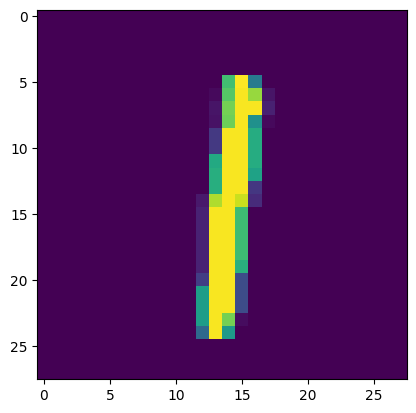

1


In [ ]:
plt.imshow(X_train[40])
plt.show(Y_train[40])
print(Y_train[40])

In [ ]:
print(np.unique(Y_train))
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [ ]:
X_train_Scaled  = X_train/255
X_test_Scaled = X_test/255

In [ ]:
print(X_train_Scaled[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(50,activation = 'relu'),
    keras.layers.Dense(50,activation = 'relu'),
    keras.layers.Dense(10,activation ='sigmoid')
])

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
model.fit(X_train_Scaled, Y_train, epochs =10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3380 - accuracy: 0.9015
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1394 - accuracy: 0.9587
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1184 - accuracy: 0.9642
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1019 - accuracy: 0.9693
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0900 - accuracy: 0.9725
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0779 - accuracy: 0.9758
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0699 - accuracy: 0.9791
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0641 - accuracy: 0.9807
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0588 - accuracy: 0.9819
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.052

In [ ]:
loss, accuracy  = model.evaluate(X_test_Scaled,Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1122 - accuracy: 0.9700


In [ ]:
print(X_test_Scaled.shape)

(10000, 28, 28)


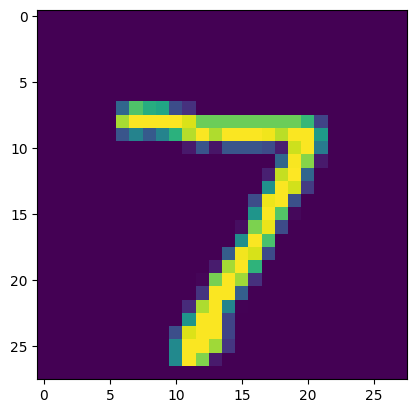

In [ ]:
plt.imshow(X_test[0])

In [ ]:
print(Y_test[0])

7


In [ ]:
Y_pred  =  model.predict(X_test_Scaled)

313/313 [==============================] - 1s 2ms/step


In [ ]:
Y_pred.shape

(10000, 10)

In [ ]:
print(Y_pred[0])

[2.33276834e-04 7.19501451e-02 2.12839529e-01 1.68818012e-01
 1.89252850e-03 7.79750198e-02 1.17839845e-04 9.99992847e-01
 1.15148276e-01 1.77957326e-01]


In [ ]:
label_predicted = np.argmax(Y_pred[0])
print(label_predicted)

7


In [ ]:
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 8, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 2, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 3, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 9, 4, 2, 0, 7, 1, 1, 2, 1, 

In [ ]:
conf_matrix= confusion_matrix(Y_test,Y_pred_labels)

In [ ]:
print(conf_matrix)

tf.Tensor(
[[ 949    1    3    0    0   11    6    2    4    4]
 [   0 1127    0    2    0    0    1    0    5    0]
 [   2    3  994   12    3    0    3    9    6    0]
 [   0    1    3  975    0   20    0    2    5    4]
 [   1    0    2    0  948    0    6    1    1   23]
 [   1    0    0    8    2  874    4    0    2    1]
 [   2    3    1    0    5   17  925    0    5    0]
 [   0    5    7    2    3    2    0  997    2   10]
 [   2    0    2   10    6    8    2    3  932    9]
 [   2    3    0    4   11    5    0    2    3  979]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

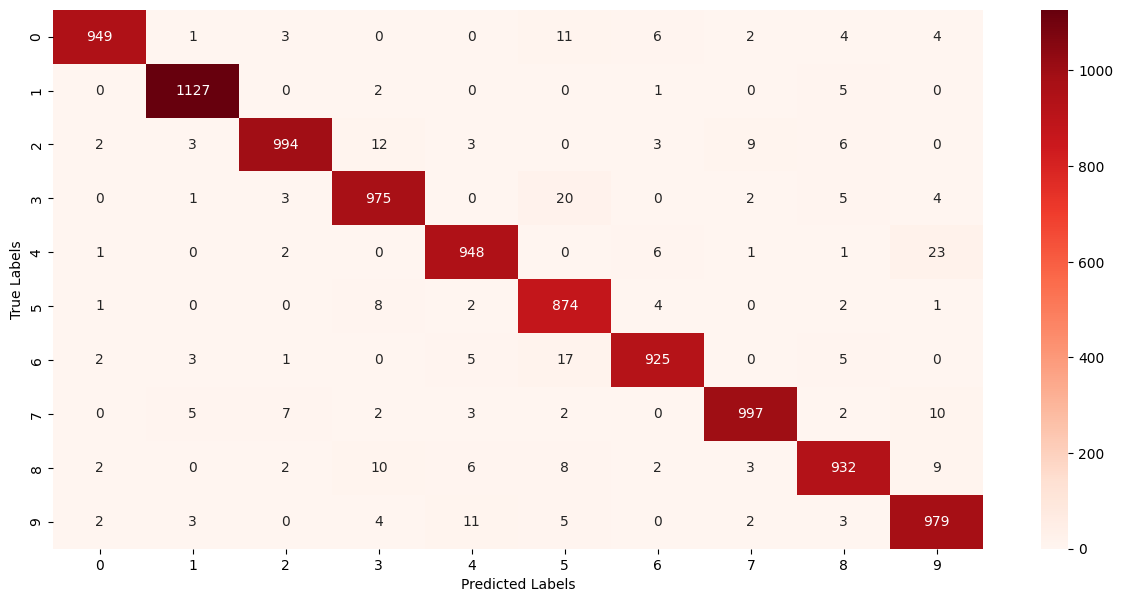

In [ ]:
plt.figure(figsize = (15,7))
sns.heatmap(conf_matrix ,annot =True , fmt = 'd',cmap = 'Reds')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

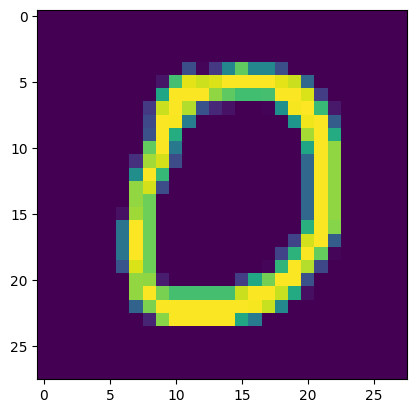

In [ ]:
plt.imshow(X_test[10])

In [ ]:

input = X_test_Scaled[10]
print(type(input))
inputReshape  = np.reshape(input,[1,28,28])
predicted = model.predict(inputReshape)
input_pred_label= np.argmax(predicted)
print(input_pred_label)

<class 'numpy.ndarray'>
1/1 [==============================] - 0s 100ms/step
0


(28, 28)
<class 'numpy.ndarray'>
1/1 [==============================] - 0s 20ms/step
[[1.0607506e-04 2.5347197e-01 1.0000000e+00 7.8320134e-01 2.5831068e-07
  7.4206684e-05 7.8364611e-03 8.1673753e-01 2.2436446e-01 8.0668028e-11]]
predicted image label :  2


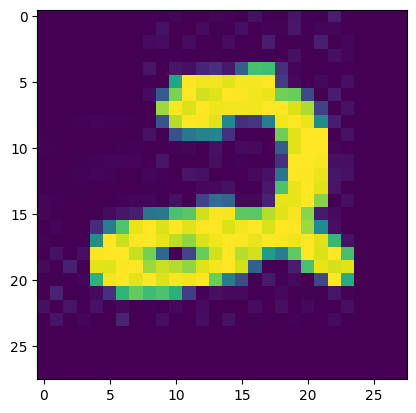

In [ ]:
input_img_path = '/content/mnist-2.jpg'

input_img  = cv2.imread(input_img_path)

input_greyscale = cv2.cvtColor(input_img ,cv2.COLOR_RGB2GRAY) # remove color

input_resize = cv2.resize(input_greyscale,(28,28))

imput_resize = input_resize/225

image_reshape = np.reshape(imput_resize ,[1,28,28])

plt.imshow(input_resize)

input_predict = model.predict(image_reshape)

input_pred_label= np.argmax(input_predict)

print("predicted image label : ",input_pred_label)



In [ ]:
input_img_path = '/content/img_100.jpg'

input_img  = cv2.imread(input_img_path)

input_greyscale = cv2.cvtColor(input_img ,cv2.COLOR_RGB2GRAY) # remove color

input_resize = cv2.resize(input_greyscale,(28,28))

imput_resize = input_resize/225

image_reshape = np.reshape(input_resize ,[1,28,28])

input_predict = model.predict(image_reshape)

input_pred_label= np.argmax(input_predict)

print("predicted image label : ",input_pred_label)

TypeError: ignored